## **Covid-19 Results Prediction**

**A speedy and accurate diagnosis of COVID-19 made possible by effective SARS-CoV-2 screening, which can also lessen the burden of the healthcare systems. There have been built prediciton models that assess the likelihood of infection by combining a number of parameters. These are meant to help medical professionals all over the world treat patients, especially in light of the scarcity of healthcare resources.**

**The current dataset has been downloaded from a government website and contains around 2,78,848 indivuals who have gone through the RT-PCR test. Dataset contains 11 columns, including 8 features suspected to play an important role in the prediciton of COVID-19 outcome. Outcome variable is covid result test positive (1) or negative (0). We have data from 11th March 2020 till 30th April 2020.**
**I am considering the data from 11th March till 15th April as a training and vaildation set (4:1), and from 16th Apil till 30th April as a test set.**

### **<font color="blue">AIM**


**<font color="white">The primary objective is to build a robust and generailzed machine learning model that can predict the chances of likelihood of covid positive or negative for a test taker based on diagnosis on symptoms.**

In [25]:
import pyforest

In [26]:
data = pd.read_csv('corona_data.csv')

<IPython.core.display.Javascript object>

C:\Users\kumba\AppData\Local\Temp\ipykernel_4816\2203508712.py:1: DtypeWarning: Columns (2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('corona_data.csv')


In [27]:
data

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...,...
278843,278844,30-04-2020,False,False,False,False,False,positive,None,male,Other
278844,278845,30-04-2020,False,False,False,False,False,negative,None,female,Other
278845,278846,30-04-2020,False,False,False,False,False,negative,None,male,Other
278846,278847,30-04-2020,False,False,False,False,False,negative,None,male,Other


### **<font color='blue'>Exploration of the data**

- **All the feature in the data is categorical features except the Ind_ID and test_date.**
- **This is a classification task as the target column is categorical too.**

In [28]:
data['Test_date'].unique()

array(['11-03-2020', '12-03-2020', '13-03-2020', '14-03-2020',
       '15-03-2020', '16-03-2020', '17-03-2020', '18-03-2020',
       '19-03-2020', '20-03-2020', '21-03-2020', '22-03-2020',
       '23-03-2020', '24-03-2020', '25-03-2020', '26-03-2020',
       '27-03-2020', '28-03-2020', '29-03-2020', '30-03-2020',
       '31-03-2020', '01-04-2020', '02-04-2020', '03-04-2020',
       '04-04-2020', '05-04-2020', '06-04-2020', '07-04-2020',
       '08-04-2020', '09-04-2020', '10-04-2020', '11-04-2020',
       '12-04-2020', '13-04-2020', '14-04-2020', '15-04-2020',
       '16-04-2020', '17-04-2020', '18-04-2020', '19-04-2020',
       '20-04-2020', '21-04-2020', '22-04-2020', '23-04-2020',
       '24-04-2020', '25-04-2020', '26-04-2020', '27-04-2020',
       '28-04-2020', '29-04-2020', '30-04-2020'], dtype=object)

 **Splitting the Test_date column into Year Month Date for easier filtering and analysis.**

In [29]:
from dateutil import parser
year=[]
month=[]
day=[]
for date in data['Test_date']:
    parsed_date = parser.parse(date, dayfirst=True)
    year.append(parsed_date.year)
    month.append(parsed_date.month)
    day.append(parsed_date.day)

data['Year'] = year
data['Month'] = month
data['Day'] = day    

In [30]:
data.drop(columns='Test_date',inplace=True)

In [31]:
data['Ind_ID'].duplicated().sum()

0

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Cough_symptoms       278848 non-null  object
 2   Fever                278848 non-null  object
 3   Sore_throat          278848 non-null  object
 4   Shortness_of_breath  278848 non-null  object
 5   Headache             278848 non-null  object
 6   Corona               278848 non-null  object
 7   Age_60_above         278848 non-null  object
 8   Sex                  278848 non-null  object
 9   Known_contact        278848 non-null  object
 10  Year                 278848 non-null  int64 
 11  Month                278848 non-null  int64 
 12  Day                  278848 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 27.7+ MB


In [33]:
data.head()

,Ind_ID,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact,Year,Month,Day
0,1,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad,2020,3,11
1,2,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad,2020,3,11
2,3,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad,2020,3,11
3,4,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad,2020,3,11
4,5,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed,2020,3,11


In [34]:
data.tail()

,Ind_ID,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact,Year,Month,Day
278843,278844,False,False,False,False,False,positive,None,male,Other,2020,4,30
278844,278845,False,False,False,False,False,negative,None,female,Other,2020,4,30
278845,278846,False,False,False,False,False,negative,None,male,Other,2020,4,30
278846,278847,False,False,False,False,False,negative,None,male,Other,2020,4,30
278847,278848,False,False,False,False,False,negative,None,female,Other,2020,4,30


In [35]:
data['Corona'].value_counts()

negative    260227
positive     14729
other         3892
Name: Corona, dtype: int64

In [36]:
data.duplicated().sum()

0

In [37]:
data.isnull().sum()

Ind_ID                 0
Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Age_60_above           0
Sex                    0
Known_contact          0
Year                   0
Month                  0
Day                    0
dtype: int64

**There are no duplicated rows or missing values in any columns.**

### **<font color='blue'>Dealing with unnecessary categories**

In [38]:
for column in data.select_dtypes('object').columns:
    value_counts = data[column].value_counts()
    print(value_counts)

False    127531
FALSE    108837
TRUE      21983
True      20245
None        252
Name: Cough_symptoms, dtype: int64
False    137774
FALSE    119070
TRUE      11750
True      10002
None        252
Name: Fever, dtype: int64
False    212584
FALSE     64337
TRUE       1198
True        728
None          1
Name: Sore_throat, dtype: int64
False    212842
FALSE     64428
TRUE       1107
True        470
None          1
Name: Shortness_of_breath, dtype: int64
False    212326
FALSE     64107
TRUE       1428
True        986
None          1
Name: Headache, dtype: int64
negative    260227
positive     14729
other         3892
Name: Corona, dtype: int64
None    127320
No      125703
Yes      25825
Name: Age_60_above, dtype: int64
female    130158
male      129127
None       19563
Name: Sex, dtype: int64
Other                     242741
Abroad                     25468
Contact with confirmed     10639
Name: Known_contact, dtype: int64


 **There are significant amount of categories with 'None' in Age 60 above columns. So I will not be taking those out instead converting/replacing 'None' into False. In other columns, I will be removing them**

In [39]:
col_none = ['Cough_symptoms','Fever','Sore_throat','Shortness_of_breath','Headache','Sex']
data[col_none] = data[col_none].replace('None', pd.NA)
data = data.dropna(subset=col_none, how='any', inplace=False)

<IPython.core.display.Javascript object>

 **I can see that almost all columns have 3-4 categories of True and False but in uppercase and lowercase. So should change that. And there are some columns with 'None' which should be removed too.**

In [40]:
col_list = ['Cough_symptoms','Fever','Sore_throat','Shortness_of_breath','Headache']
data[col_list] = data[col_list].replace({"TRUE": True, "FALSE": False})

C:\Users\kumba\AppData\Local\Temp\ipykernel_4816\3722520772.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col_list] = data[col_list].replace({"TRUE": True, "FALSE": False})


In [41]:
data

,Ind_ID,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact,Year,Month,Day
13727,13728,True,False,False,False,False,negative,No,male,Abroad,2020,3,22
13728,13729,True,False,False,False,False,negative,No,female,Abroad,2020,3,22
13730,13731,True,True,False,False,False,positive,Yes,female,Other,2020,3,22
13731,13732,False,False,False,False,False,other,No,female,Other,2020,3,22
13732,13733,False,False,False,False,False,other,No,female,Other,2020,3,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...
278843,278844,False,False,False,False,False,positive,None,male,Other,2020,4,30
278844,278845,False,False,False,False,False,negative,None,female,Other,2020,4,30
278845,278846,False,False,False,False,False,negative,None,male,Other,2020,4,30
278846,278847,False,False,False,False,False,negative,None,male,Other,2020,4,30


**I am going to replace None with the majority category in the Age_60_above column.**

In [42]:
data['Age_60_above'] = data['Age_60_above'].replace({'None':'No'})

C:\Users\kumba\AppData\Local\Temp\ipykernel_4816\1532318456.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Age_60_above'] = data['Age_60_above'].replace({'None':'No'})


In [43]:
for column in data.select_dtypes(include=['object', 'bool']).columns:
    value_counts = data[column].value_counts()
    print(value_counts)

False    219387
True      39655
Name: Cough_symptoms, dtype: int64
False    238848
True      20194
Name: Fever, dtype: int64
False    257523
True       1519
Name: Sore_throat, dtype: int64
False    257943
True       1099
Name: Shortness_of_breath, dtype: int64
False    256914
True       2128
Name: Headache, dtype: int64
negative    242136
positive     13532
other         3374
Name: Corona, dtype: int64
No     234962
Yes     24080
Name: Age_60_above, dtype: int64
female    130030
male      129012
Name: Sex, dtype: int64
Other                     225638
Abroad                     23665
Contact with confirmed      9739
Name: Known_contact, dtype: int64


#### **I have converted all categorical columns to have just two categories that are:**
- **Converted 'TRUE' into True and 'FALSE' into False**
- **Removed all columns with 'None'**
- **Replaced 'None' with No in Age60above column.**

 **Corona and Known contact columns have other category and it needs to be checked with the data provider for further actions.**

In [44]:
data[data['Corona']=='other'].head()

,Ind_ID,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact,Year,Month,Day
13731,13732,False,False,False,False,False,other,No,female,Other,2020,3,22
13732,13733,False,False,False,False,False,other,No,female,Other,2020,3,22
13742,13743,False,False,False,False,False,other,No,female,Other,2020,3,22
13744,13745,False,False,False,False,False,other,No,female,Other,2020,3,22
13805,13806,False,False,False,False,False,other,No,male,Other,2020,3,22


 **UPDATE: It is highly likely that the 'other' category in corona column means Invalid or indeterminate tests/results as it is unlikely that it is a data entry error because there are 1500+ rows. But since it just a small part of the data(1-2%), I am going to delete them as it would only hinder my model prediction since we are only predicting 'Positive' or 'Negative' test results according to the symptoms and features.**
 
  **For the known contacts column,'other' category take up a highly significant part of the column and it can mean other ways of contact that the person has been come across. So I will be keeping the category**

In [45]:
data = data[data['Corona']!='other']

In [46]:
data['Corona'].value_counts()

negative    242136
positive     13532
Name: Corona, dtype: int64

<Axes: ylabel='Corona'>

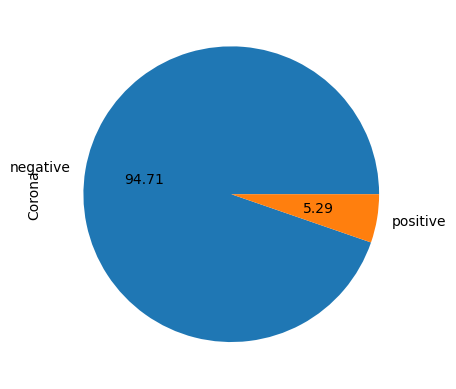

In [47]:
data['Corona'].value_counts().plot.pie(autopct='%.2f')

 **The target column is highly imbalanced which shows that about 5% of the people test positive to corona.**

 **In the context of COVID-19 prediction, where false negatives can have serious consequences, it's crucial to ensure that the model performs well in identifying positive cases. So it is important to address the class imbalance. Before that I will deal with feature encoding.**

### **SQL**

#### **For further analysis I am going to use duckdb to run some SQL queries.**

In [ ]:
%pip install duckdb
import duckdb
conn=duckdb.connect()
conn.register('data_clean', data)

Note: you may need to restart the kernel to use updated packages.


In [ ]:
conn.execute('select * from data_clean').fetchdf()

,Ind_ID,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact,Year,Month,Day
0,13728,True,False,False,False,False,negative,No,male,Abroad,2020,3,22
1,13729,True,False,False,False,False,negative,No,female,Abroad,2020,3,22
2,13731,True,True,False,False,False,positive,Yes,female,Other,2020,3,22
3,13735,False,False,False,False,False,negative,No,male,Other,2020,3,22
4,13736,False,False,False,False,False,negative,No,female,Other,2020,3,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...
255663,278844,False,False,False,False,False,positive,No,male,Other,2020,4,30
255664,278845,False,False,False,False,False,negative,No,female,Other,2020,4,30
255665,278846,False,False,False,False,False,negative,No,male,Other,2020,4,30
255666,278847,False,False,False,False,False,negative,No,male,Other,2020,4,30


#### **1.Find the number of corona patients who faced shortness of breath.**

In [ ]:
conn.execute("select count(*) as Patients from data_clean where Corona='positive' and Shortness_of_breath=True").fetchdf()

,Patients
0,979


In [ ]:
conn.execute("select count(*) as Patients from data_clean where Shortness_of_breath=True").fetchdf()

,Patients
0,1078


In [ ]:
conn.execute("select count(*) from data_clean where Corona='positive'").fetchdf()

,count_star()
0,13532


**Out of 1078 patients who had shortness of breath, 979 of them are corona patients.** 

**Or out of 13532 corona patients, only 979 of them had shortness of breath.**

#### **2.Find the number of negative corona patients who have fever and sore_throat.**

In [ ]:
conn.execute("SELECT count(*) from data_clean where Corona='negative' and Fever=True and Sore_throat=True").fetchdf()

,count_star()
0,50


In [ ]:
conn.execute("select count(*) from data_clean where Corona='negative'").fetchdf()

,count_star()
0,242136


**Out of 242,136 people who tested negative for corona, 50 of them had fever and sore throat. It means we cannot conclude a person has corona if has fever and sore throat.**

#### **3.Group the data by month and rank the number of positive cases.**

In [ ]:
conn.execute("select Month,count(Corona) as CoronaPositive from data_clean where Corona='positive' group by Month").fetchdf()

,Month,CoronaPositive
0,4,8772
1,3,4760


**Out of 13532 people who tested +ve, 8772 were tested positive in April and 4760 in March. We can see that corona spread almost 100% more after March,2020.**

#### **4.Find the female negative corona patients who faced cough and headache.**

In [ ]:
conn.execute("select Sex, Corona, Cough_symptoms, Headache from data_clean where Sex='female' and Corona='negative' and Cough_symptoms=True and Headache=True").fetchdf()

,Sex,Corona,Cough_symptoms,Headache
0,female,negative,True,True
1,female,negative,True,True
2,female,negative,True,True
3,female,negative,True,True
4,female,negative,True,True
5,female,negative,True,True
6,female,negative,True,True
7,female,negative,True,True
8,female,negative,True,True
9,female,negative,True,True


In [ ]:
len(data[(data['Sex']=='female') & (data['Corona']=='negative')])

122388

**Out of 122388 female people who tested negative, only 32 had cough symptoms and headache.**

#### **5.How many elderly corona patients have faced breathing problems?**

In [ ]:
conn.execute("select Age_60_above, Corona, Shortness_of_breath from data_clean where Age_60_above='Yes' and Corona='positive' and Shortness_of_breath=True").fetchdf()

,Age_60_above,Corona,Shortness_of_breath
0,Yes,positive,True
1,Yes,positive,True
2,Yes,positive,True
3,Yes,positive,True
4,Yes,positive,True
...,...,...,...
222,Yes,positive,True
223,Yes,positive,True
224,Yes,positive,True
225,Yes,positive,True


In [ ]:
len(data[(data['Age_60_above']=='Yes') & (data['Corona']=='positive')])

2053

**Out of 2053 elderly corona patients, 227 of them faced breathing problems.**

#### **6.Which three symptoms were more common among COVID positive patients?**

In [ ]:
conn.execute("SELECT Corona,SUM(CASE WHEN Cough_symptoms THEN 1 ELSE 0 END) AS Cough_count,SUM(CASE WHEN Fever THEN 1 ELSE 0 END) AS Fever_count,SUM(CASE WHEN Sore_throat THEN 1 ELSE 0 END) AS Sore_throat_count,SUM(CASE WHEN Shortness_of_breath THEN 1 ELSE 0 END) AS Shortness_of_breath_count,SUM(CASE WHEN Headache THEN 1 ELSE 0 END) AS Headache_count,COUNT(*) AS count_of_symptoms FROM data_clean WHERE Corona='positive' GROUP BY Corona ORDER BY count_of_symptoms desc").fetchdf()

,Corona,Cough_count,Fever_count,Sore_throat_count,Shortness_of_breath_count,Headache_count,count_of_symptoms
0,positive,6064.0,5040.0,1359.0,979.0,2005.0,13532


**Cough symptoms, Fever, Sore throat are the 3 most common symptoms in Corona positive patients.**

#### **7.Which symptom was less common among COVID negative people?**

In [ ]:
conn.execute("SELECT Corona,SUM(CASE WHEN Cough_symptoms THEN 1 ELSE 0 END) AS Cough_count,SUM(CASE WHEN Fever THEN 1 ELSE 0 END) AS Fever_count,SUM(CASE WHEN Sore_throat THEN 1 ELSE 0 END) AS Sore_throat_count,SUM(CASE WHEN Shortness_of_breath THEN 1 ELSE 0 END) AS Shortness_of_breath_count,SUM(CASE WHEN Headache THEN 1 ELSE 0 END) AS Headache_count,COUNT(*) AS count_of_symptoms FROM data_clean WHERE Corona='negative' GROUP BY Corona ORDER BY count_of_symptoms asc").fetchdf()

,Corona,Cough_count,Fever_count,Sore_throat_count,Shortness_of_breath_count,Headache_count,count_of_symptoms
0,negative,32988.0,14814.0,137.0,99.0,98.0,242136


**The 3 most uncommon symptoms in people who tested negative are Sore throat, shortness of breath, headache. Most common symptoms in negative people are same as positive people.**

**From the last 2 analysis we can say that cough and fever symptoms aren't enough to determine a person's covid result as both negative and positive have these symptoms.**

#### **8.What are the most common symptoms among COVID positive males whose known contact was abroad?**

In [ ]:
conn.execute("SELECT Corona,Sex,SUM(CASE WHEN Cough_symptoms THEN 1 ELSE 0 END) AS Cough_count,SUM(CASE WHEN Fever THEN 1 ELSE 0 END) AS Fever_count,SUM(CASE WHEN Sore_throat THEN 1 ELSE 0 END) AS Sore_throat_count,SUM(CASE WHEN Shortness_of_breath THEN 1 ELSE 0 END) AS Shortness_of_breath_count,SUM(CASE WHEN Headache THEN 1 ELSE 0 END) AS Headache_count,COUNT(*) AS count_of_symptoms FROM data_clean WHERE Corona='positive' and Sex='male' GROUP BY Corona,Sex ORDER BY count_of_symptoms desc").fetchdf()

,Corona,Sex,Cough_count,Fever_count,Sore_throat_count,Shortness_of_breath_count,Headache_count,count_of_symptoms
0,positive,male,3451.0,3060.0,640.0,520.0,1026.0,7507


**Same case here as the last 2 analysis. Cough, Fever, Sore throat are the most common symptoms among male corona patients**

In [48]:
data.describe(percentiles=[0.25,0.3,0.35,0.4,0.45,0.5,0.75,0.8,0.85,0.9,0.95,0.99])

,Ind_ID,Year,Month,Day
count,255668.000000,255668.0,255668.000000,255668.000000
mean,146680.987190,2020.0,3.797339,18.075113
std,76670.438508,0.0,0.401983,8.934815
min,13728.000000,2020.0,3.000000,1.000000
25%,80018.750000,2020.0,4.000000,11.000000
30%,93434.100000,2020.0,4.000000,13.000000
35%,106687.450000,2020.0,4.000000,15.000000
40%,119871.800000,2020.0,4.000000,17.000000
45%,133226.150000,2020.0,4.000000,19.000000
50%,147203.500000,2020.0,4.000000,20.000000


**Since this is a dataset mostly with categorical columns and there are only ID and the test dates columns as numerical columns, I can cancel out the chances of outliers presence.**

**Now let's go into Feature encoding to turn categorical columns into numerical (1&0). In order to do encoding, first I am going to split the data into features and target to avoid data leakage.**

In [49]:
X = data.drop(columns=['Corona'])
Y = data[['Corona']]
X.shape

(255668, 12)

### **<font color='blue'>Feature Encoding**

**Label Encoding**

In [50]:
var_list = ['Cough_symptoms','Fever','Sore_throat','Shortness_of_breath','Headache']

X[var_list] = X[var_list].astype(bool)

In [51]:
def encode_boolean_as_int(x):
    if x == True:
        return 1
    elif x == False:
        return 0
    else:
        return x

X[var_list] = X[var_list].applymap(encode_boolean_as_int)

In [52]:
#Encoded the gender column using simple binary encoding.
X['Sex'] = X['Sex'].map({'female':1,'male':0})

In [53]:
X['Age_60_above'] = X['Age_60_above'].map({'Yes':1,'No':0})

**Dummy Encoding**

In [54]:
X['Known_contact'].value_counts()

Other                     222766
Abroad                     23309
Contact with confirmed      9593
Name: Known_contact, dtype: int64

In [32]:
Known_contact_enc = pd.get_dummies(X['Known_contact'],drop_first=True)
X= pd.concat([X,Known_contact_enc],axis=1)
X.drop(columns=['Known_contact'],inplace=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Encoding the target column with label encoding**

In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y['Corona'] = le.fit_transform(Y['Corona'])

C:\Users\kumba\AppData\Local\Temp\ipykernel_6464\3695764137.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y['Corona'] = le.fit_transform(Y['Corona'])


### **<font color='blue'>Balancing the data**

**Using SMOTE(Synthetic Minority Oversampling Technique) on the minority to oversample by creating synthetic rows using KNN algorithm.**

In [34]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X,Y)

In [35]:
X_smote

,Ind_ID,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Age_60_above,Sex,Year,Month,Day,Contact with confirmed,Other
0,13728,1,0,0,0,0,0,0,2020,3,22,0,0
1,13729,1,0,0,0,0,0,1,2020,3,22,0,0
2,13731,1,1,0,0,0,1,1,2020,3,22,0,1
3,13735,0,0,0,0,0,0,0,2020,3,22,0,1
4,13736,0,0,0,0,0,0,1,2020,3,22,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
484267,76695,0,0,0,0,0,0,1,2020,4,2,0,0
484268,172863,0,0,0,0,0,0,0,2020,4,17,1,0
484269,72308,1,0,0,0,0,0,0,2020,4,1,0,1
484270,77414,1,1,0,0,0,0,0,2020,4,2,0,0


In [36]:
data_date = X_smote[['Month','Day']]

In [37]:
Y_smote = pd.concat([y_smote,data_date],axis=1)

<IPython.core.display.Javascript object>

### **<font color='blue'>Feature Selection**

In [38]:
target_column_index = Y_smote.columns.get_loc('Corona')
target = Y_smote.iloc[:, target_column_index]

In [39]:
# apply SelectKBest class to extract top 10 best features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X_smote,target)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_smote.columns)
#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(15,'Score'))  #print 15 best features

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

                     Specs         Score
0                   Ind_ID  1.669553e+09
12                   Other  1.111237e+05
11  Contact with confirmed  6.329066e+04
7                      Sex  2.778094e+04
2                    Fever  1.429853e+04
10                     Day  1.014332e+04
5                 Headache  9.367938e+03
1           Cough_symptoms  7.859607e+03
3              Sore_throat  4.413179e+03
6             Age_60_above  2.886702e+03
4      Shortness_of_breath  2.864070e+03
9                    Month  8.065751e+02
8                     Year  0.000000e+00


### <font color='blue'>**Splitting the data**

**I will be dividing the data into train and test according to a specific date. All data before 15th April 2020 will be considered Training data.**

In [40]:
#split_date = 
X_train_1 = X_smote[X_smote['Month']==3 ]
X_train_2 = X_smote[(X_smote['Month']==4) & ((X_smote['Day']==15) | (X_smote['Day']<15 ))]
y_train_1 =Y_smote[Y_smote['Month']==3 ]
y_train_2 = Y_smote[(Y_smote['Month']==4) & ((Y_smote['Day']==15) | (Y_smote['Day']<15 )) ]
X_test = X_smote[(X_smote['Month']==4) & (X_smote['Day'] > 15 )]
y_test = Y_smote[(Y_smote['Month']==4) & (Y_smote['Day'] > 15 )]

In [41]:
X_train = pd.concat([X_train_1, X_train_2],axis=0)
y_train = pd.concat([y_train_1, y_train_2],axis=0)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [42]:
y_train

,Corona,Month,Day
0,0,3,22
1,0,3,22
2,1,3,22
3,0,3,22
4,0,3,22
...,...,...,...
484264,1,4,3
484267,1,4,2
484269,1,4,1
484270,1,4,2


**Now I'm going to delete the Year  Day columns and the Id column from X as they are unnecessary for Model building and the Month and Day columns from Y because the target data should only have 1 column (1D)**

**I am keeping Month column in X table as the month of the test may have importance to our predicition.**

In [43]:
X_train.drop(columns=['Year','Day','Ind_ID'], inplace=True)
X_test.drop(columns=['Year','Day','Ind_ID'], inplace=True)
y_train.drop(columns=['Month','Day'], inplace=True)
y_test.drop(columns=['Month','Day'], inplace=True)            

C:\Users\kumba\AppData\Local\Temp\ipykernel_6464\3658016404.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.drop(columns=['Year','Day','Ind_ID'], inplace=True)
C:\Users\kumba\AppData\Local\Temp\ipykernel_6464\3658016404.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test.drop(columns=['Month','Day'], inplace=True)


**Now I am going to further divide the training data into train and VALIDATION data in a ratio of 4:1.**

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,test_size=0.25, random_state=42,stratify=y_train)

In [45]:
X_train.shape

(245512, 10)

In [46]:
y_test.shape

(156922, 1)

In [47]:
y_valid.shape

(81838, 1)

### **<font color='blue'>Model Building and Tuning**

In [48]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.model_selection import GridSearchCV

**Logistic Regression**

In [84]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression(penalty='l1',C=10,solver='liblinear',random_state=25)
log.fit(X_train,y_train)

c:\Users\kumba\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=10, penalty='l1', random_state=25, solver='liblinear')

In [85]:
y_pred_valid = log.predict(X_valid)
accuracy_score(y_valid,y_pred_valid)

0.8550551088736283

In [86]:
y_pred_test = log.predict(X_test)
report1 = classification_report(y_test,y_pred_test)
print(report1)

              precision    recall  f1-score   support

           0       0.91      0.92      0.92    109716
           1       0.81      0.80      0.80     47206

    accuracy                           0.88    156922
   macro avg       0.86      0.86      0.86    156922
weighted avg       0.88      0.88      0.88    156922



**Decision Tree**

In [87]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=8,random_state=42)
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=8, random_state=42)

In [88]:
y_pred_valid = clf.predict(X_valid)
accuracy_score(y_valid,y_pred_valid)

0.8682396930521273

**Kfold Cross validation**

In [89]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(clf, X_valid, y_valid, cv=kf,scoring='accuracy')
print(scores)

[0.87255621 0.86705767 0.87298387 0.8609397  0.86888251]


In [90]:
y_pred_train = clf.predict(X_train)
accuracy_score(y_train,y_pred_train)

0.8697375281045325

In [91]:
y_pred_test = clf.predict(X_test)
report2 = classification_report(y_test,y_pred_test)
print(report2)

              precision    recall  f1-score   support

           0       0.91      0.91      0.91    109716
           1       0.80      0.80      0.80     47206

    accuracy                           0.88    156922
   macro avg       0.85      0.85      0.85    156922
weighted avg       0.88      0.88      0.88    156922



**Random Forest**

In [92]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10,max_depth=9,random_state=42,max_features=5)
rf.fit(X_train,y_train)

C:\Users\kumba\AppData\Local\Temp\ipykernel_6464\3880863308.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


RandomForestClassifier(max_depth=9, max_features=5, n_estimators=10,
                       random_state=42)

In [93]:
y_pred_valid = rf.predict(X_valid)
f1_score(y_valid,y_pred_valid)

0.8880780369483622

In [94]:
#Checking overfitting
y_pred_train = rf.predict(X_train)
accuracy_score(y_train, y_pred_train)

0.8706051028055655

**Kfold cross validation**

In [95]:
kf = KFold(n_splits=3, shuffle=True, random_state=42)
scores = cross_val_score(rf, X_valid, y_valid, cv=kf,scoring='precision')
print(scores)

c:\Users\kumba\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


c:\Users\kumba\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\kumba\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[0.9101762  0.90625805 0.90720715]


In [96]:
report3 = classification_report(y_test,y_pred_test)
print(report3)

              precision    recall  f1-score   support

           0       0.91      0.91      0.91    109716
           1       0.80      0.80      0.80     47206

    accuracy                           0.88    156922
   macro avg       0.85      0.85      0.85    156922
weighted avg       0.88      0.88      0.88    156922



**Confusion Matrix**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

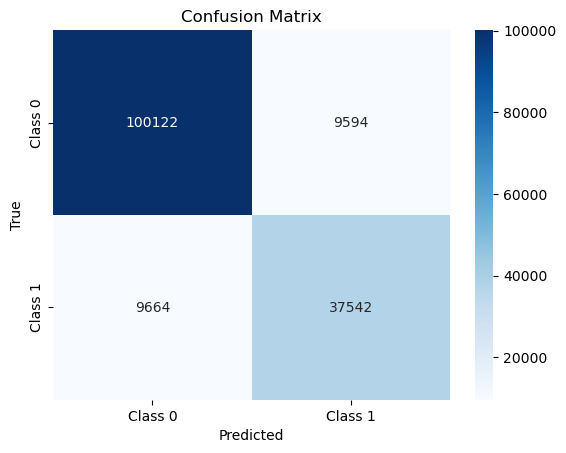

In [97]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_test)

# Plotting the confusion matrix 
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

**XGBOOST**

In [98]:
import xgboost as xgb
from xgboost import XGBClassifier
data_dmatrix = xgb.DMatrix(data=X_smote,label=Y_smote)

In [99]:
xg_class = XGBClassifier(objective ='multi:softmax',num_class=2, random_state=42,max_depth = 10, alpha = 10, n_estimators = 10)
xg_class.fit(X_train,y_train)

XGBClassifier(alpha=10, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None, num_class=2, ...)

In [100]:
y_pred_test = xg_class.predict(X_test)
report4 = classification_report(y_test,y_pred_test)
print(report4)

              precision    recall  f1-score   support

           0       0.91      0.91      0.91    109716
           1       0.80      0.80      0.80     47206

    accuracy                           0.88    156922
   macro avg       0.85      0.85      0.85    156922
weighted avg       0.88      0.88      0.88    156922



**Gradiant Boosting**

In [101]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import make_regression
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_regressor.fit(X_train, y_train)

c:\Users\kumba\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(random_state=42)

In [102]:
y_pred = gb_regressor.predict(X_test)
report5 = classification_report(y_test,y_pred_test)
print(report5)

              precision    recall  f1-score   support

           0       0.91      0.91      0.91    109716
           1       0.80      0.80      0.80     47206

    accuracy                           0.88    156922
   macro avg       0.85      0.85      0.85    156922
weighted avg       0.88      0.88      0.88    156922



### **<font color="blue">Feature Importance**

In [103]:
coefficients = log.coef_[0]
# Print feature importance
for feature_name, coefficient in zip(feature_names, coefficients):
    print(f"Feature: {feature_name}, Coefficient: {coefficient}")


Feature: Cough_symptoms, Coefficient: -0.7837884566583282
Feature: Fever, Coefficient: 1.0447074678065715
Feature: Sore_throat, Coefficient: 3.130828085806648
Feature: Shortness_of_breath, Coefficient: 3.41360640940924
Feature: Headache, Coefficient: 4.357280700887581
Feature: Age_60_above, Coefficient: -0.6136833219596625
Feature: Sex, Coefficient: -1.4183762244625862
Feature: Month, Coefficient: -0.0322185228275036
Feature: Contact with confirmed, Coefficient: 1.2557056905670987
Feature: Other, Coefficient: -3.272011316362422


**The logistic regression model is giving most importance to Headache, shortness of breath and sore throat symptoms.**
**So we can consider this model for our prediciton.**

<IPython.core.display.Javascript object>

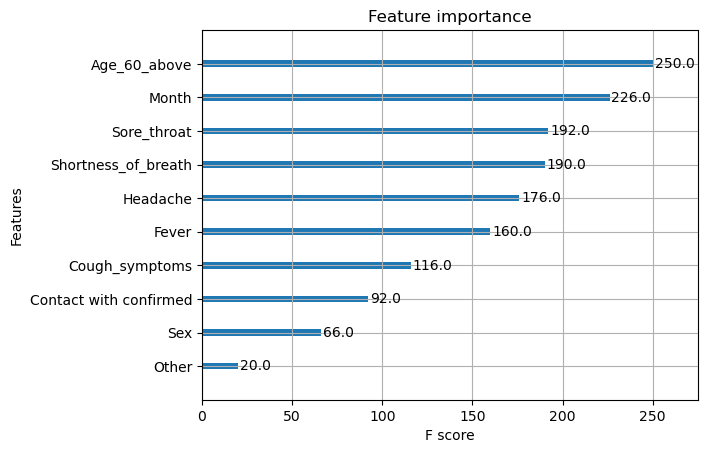

In [104]:
#Checking the feature importance of XGBoost model.
xgb.plot_importance(xg_class, max_num_features=15) 
plt.show()

**We can see that the XGBoost model gives the most importance if a person is 60+, the month getting covid positive and then the rest of the symptoms one by one. The least importance is given to the person's sex and "other" in known contacts.**

Feature 1: 0.060261790206581345
Feature 2: 0.057919936090965976
Feature 3: 0.0067379562092216
Feature 4: 0.004372416905388452
Feature 5: 0.016808446299106418
Feature 6: 0.009594645004048925
Feature 7: 0.05289450255794338
Feature 8: 0.011988529024044455
Feature 9: 0.027952215396682974
Feature 10: 0.7514695623060166


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

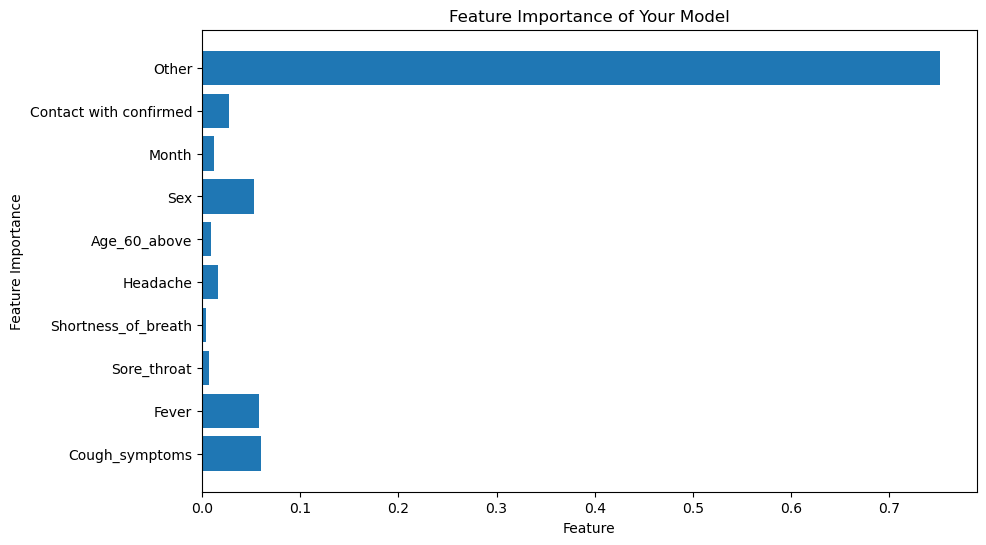

In [105]:
# Checking feature importance in RandomForest model
feature_importance = rf.feature_importances_
feature_names = X_train.columns
# Print feature importance
for i, importance in enumerate(feature_importance):
    print(f"Feature {i+1}: {importance}")

plt.figure(figsize=(10, 6))
plt.barh(feature_names,feature_importance,align='center')
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('Feature Importance of Your Model')
plt.show()

**The Random Forest and Decision Tree models are giving importance to "Known contacts" columns substantianly which would probably be a huge error.**

**<font color="red"> So for this classification task I am not considering Tree-based models.**

##### **After bulding and testing five different models to predict and find the best model with acceptable accuracy.**

- **Logistic Regression performed well giving importance to the right symptoms.**
- **Tree-based models(Random forest & decision tree) performed well on tests but might be skewed to an extent as it is giving significant importance to some unwanted features. So for this classification task, I am not considering these models.**
- **The boosting algorithms worked very well in terms of performance and they gave the right importance to all the crucial features such as age of the person, symptoms like headache, sore throat etc.**

##### **After consideration, we can go with either of the boosting algorithms as first priority.**